# VEHICLE COLLISIONS IN SEATTLE
## IBM CAPSTONE

### BY ARTEM SHEVCHUK

Contact the author:
https://www.linkedin.com/in/artem-sheva/

Email:
artem.shevchuk.uae@gmail.com

## TABLE OF CONTENTS

1. INTRRODUCTION
2. A DESCRIPTION OF DATA AND PREPARATION FOR ANALYSIS
3. METHODOLOGY
4. RESULTS
5. DISCUSSION
6. CONCLUSION

## INTRODUCTION

Road accidents have become very common nowadays. As more people are buying automobiles, the incidences of road accidents are just increasing day by day. According to The Annual Global Road Crash Statistics report published by www.asirt.org, approximately 1.35 million people die in road crashes each year, and on average 3,700 people lose their lives every day on the roads. An additional 20-50 million suffer non-fatal injuries, often resulting in long-term disabilities.


Considering the importance of this problem, we have to try our best to understand what factors affect the probability of being injured during the car crash the most. To achieve this, we will use the modern tools data science has to offer.
This research is based on collisions data from Seattle; however, I believe that the derived conclusions can serve as a benchmark for all other cities and counties. 

This report will be of interest to anyone who drives cars or works in traffic regulation authorities. Understanding the roots of this problem may bring us one step closer to making our cities a safer place to live and may save the lives of those readers who take this issue seriously.

## A DESCRIPTION OF DATA AND PREPARATION FOR ANALYSIS

Every data-driven solution requires one most important thing: data. In our research, we will use the Traffic Collisions Dataset compiled and maintained by the Seattle Department of Transportation (SDOT). This dataset has been referred to within the IBM capstone project, and therefore we have no doubts regarding its authenticity and quality.
Below is the quick summary of our dataset:

a.	Range: 2004 to Present
b.	37 Attributes
c.	Almost 195,000 rows (observations)

The key intention of our research will be an attempt to measure the impact of various characteristics on the severity of the accident. 

Those severities are: 1 for Property Damage, 2 for Injury

For this research I decided to create 2 separate data frames: one will be used for exploratory analysis and another for the machine learning (ML) algorithm. The key motivation behind separating the dataset into  2 is the fact that data is labeled unevenly, which means that while trimming data for unbiased model creation we will lose almost half of observations, which can be useful for exploratory analysis. I hope after following the below steps it all will make sense to you. 

Let's do some data wrangling!

### Step 1: Import libraries for data wrangling and cleaning

In [1]:
import pandas as pd
import numpy as np

### Step 2: Download the dataset and read it as Pandas data frame

In [2]:
!wget -O Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
df = pd.read_csv("Collisions.csv")
print(df.dtypes)

--2020-09-22 11:20:22--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Collisions.csv’

Collisions.csv      100%[===================>]  70.49M  21.1MB/s    in 3.4s    

2020-09-22 11:20:26 (20.5 MB/s) - ‘Collisions.csv’ saved [73917638/73917638]



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### Step 3: Familiarize ourselves with the way the data looks like

In [3]:
print(df.shape)
df.head()

(194673, 38)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Step 4: Create exploratory data frame (contains all rows with observations for exploratory analysis)

In [3]:
df_explore = df[['SEVERITYCODE','X', 'Y', 'PERSONCOUNT', 'INCDATE',  'ADDRTYPE']]
print(df_explore.shape)
df_explore.head()

(194673, 6)


,SEVERITYCODE,X,Y,PERSONCOUNT,INCDATE,ADDRTYPE
0,2,-122.323148,47.703140,2,2013/03/27 00:00:00+00,Intersection
1,1,-122.347294,47.647172,2,2006/12/20 00:00:00+00,Block
2,1,-122.334540,47.607871,4,2004/11/18 00:00:00+00,Block
3,1,-122.334803,47.604803,3,2013/03/29 00:00:00+00,Block
4,2,-122.306426,47.545739,2,2004/01/28 00:00:00+00,Intersection


### Step 5: Create CDF data frame (contains cathegorical variables for classifications algorithm) 

In [5]:
cdf = df[['SEVERITYCODE', 'ADDRTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']]
print(cdf.shape)
cdf.head()

(194673, 7)


,SEVERITYCODE,ADDRTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,N,Overcast,Wet,Daylight,NaN
1,1,Block,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,0,Overcast,Dry,Daylight,NaN
3,1,Block,N,Clear,Dry,Daylight,NaN
4,2,Intersection,0,Raining,Wet,Daylight,NaN


### Step 6: Clean CDF data frame and prepare it for analysis

In [6]:
#TO AVOID MODEL BIAS WE NEED EQUAL AMOUNT OF SEVERITY 1 AND 2
cdf_new = cdf.sort_values(by=['SEVERITYCODE'], ascending = False).reset_index()
del cdf_new['index']
cdf_new = cdf_new[0:116376]
cdf_new['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [7]:
#FOR A TIME BEING ALL FLOATS TO LOOK LIKE INTEGERS
pd.options.display.float_format = '{:,.0f}'.format

In [8]:
#CLEANING ADDRTYPE (1 for Intersection, 0 for Block, drop Alley)
df_filtered = cdf_new[cdf_new['ADDRTYPE'] != 'Alley']
df_filtered['ADDRTYPE'].value_counts()
df_filtered = df_filtered.replace(to_replace ="Block", value = 0) 
df_filtered = df_filtered.replace(to_replace ="Intersection", value = 1) 

#CLEANING UNDERINFL (1 for TRUE, 0 for FALSE)
df_filtered = df_filtered.replace(to_replace ="N", value = 0) 
df_filtered = df_filtered.replace(to_replace ="Y", value = 1) 
df_filtered['UNDERINFL'] = df_filtered['UNDERINFL'].astype(str)
df_filtered = df_filtered.loc[df_filtered['UNDERINFL'] != 'nan']
df_filtered['UNDERINFL'] = df_filtered['UNDERINFL'].astype(int)

#CLEANING WEATHER (1 for all kinds of bad weather, 0 for clear, drop unknown)
df_filtered = df_filtered.loc[df_filtered['WEATHER'] != 'Unknown']
df_filtered = df_filtered.replace(to_replace ="Clear", value = 0) 
df_filtered = df_filtered.replace(to_replace = ["Raining", "Overcast", "Snowing", "Other", "Fog/Smog/Smoke", "Sleet/Hail/Freezing Rain", 
                                  "Blowing Sand/Dirt", "Severe Crosswind", "Partly Cloudy"], value = 1) 

#CLEANING ROAD CONDITIONS (1 for all kinds of bad conditions, 0 for dry, drop unknown)
df_filtered = df_filtered.loc[df_filtered['ROADCOND'] != 'Unknown']
df_filtered = df_filtered.replace(to_replace ="Dry", value = 0) 
df_filtered = df_filtered.replace(to_replace = ["Wet", "Ice", "Snow/Slush", "Standing Water", "Oil", "Sand/Mud/Dirt"], value = 1) 

#CLEANING LIGHT CONDITIONS (1 for all kinds of bad conditions, 0 for Daylight, drop unknown)
df_filtered = df_filtered.loc[df_filtered['LIGHTCOND'] != 'Unknown']
df_filtered = df_filtered.replace(to_replace ="Daylight", value = 0) 
df_filtered = df_filtered.replace(to_replace = ["Dark - Street Lights On", "Dusk", "Dawn", "Dark - No Street Lights", "Dark - Street Lights Off", "Dark - Unknown Lighting"], value = 1) 

#CLEANING SPEEDING
df_filtered['SPEEDING'] = df_filtered['SPEEDING'].fillna(0)

#FINAL BALANCING OF DATA
df_final = df_filtered.sort_values(by=['SEVERITYCODE'], ascending = False)
df_final.reset_index(drop=True, inplace=True)
df_final = df_final[7545:104207]
df_final = df_final.fillna(0)
df_final['SEVERITYCODE'].value_counts()

2    48331
1    48331
Name: SEVERITYCODE, dtype: int64

In [9]:
#OUR FINAL DF FOR MACHINE LEARNING ALGORITHM LOOKS LIKE:
print(df_final.shape)
df_final.head()

(96662, 7)


,SEVERITYCODE,ADDRTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
7545,2,1,0,1,1,1,0
7546,2,0,0,1,0,0,0
7547,2,0,0,0,0,0,0
7548,2,1,0,0,0,0,0
7549,2,0,0,0,0,0,0


### Well done! Now we can move to the next part, Methodology

## METHODOLOGY

This section is the core of our research. Here we will explore the data and try to come up with some scientific conclusions on what attributes impact the chance of injury during a car accident.

I assume that majority of my readers (including myself before I got the assignment) are not familiar with how Seattle looks like and what is the geographic layout of this town. It will be helpful to start our research with anchoring to something visual. 

### Creating a dynamic map with Folium

We will build a map of the city and include their dynamic accident markers. For that purpose, we will use the Folium library in Python and create another data frame, which will contain only X & Y coordinates alongside with ADDRTYPE label. To save the computational cost and time, we will use a random sample of 400 observations from the data set. This should be sufficient enough to provide us with the basic idea of the accident density based on the city area. 

In [7]:
#INSTALL AND IMPORT FOLIUM
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

#DEFINE LATITUDE AND LONGTITUDE VALUES OF SEATTLE
latitude = 47.60
longitude = -122.33

#DEFINE THE MAP
Seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

#RETRIEVE ACCIDENTS COORDINATES AND LOCATION TYPE
df_map = df_explore[['X', 'Y', 'ADDRTYPE']]
df_map = df_map.dropna()

#TAKE 400 RANDOM SAMPLES
df_sample = df_map.sample(n=400, random_state=1)

#PLACE INCIDENTS ON A MAP
from folium import plugins
incidents = plugins.MarkerCluster().add_to(Seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_sample.Y, df_sample.X, df_sample.ADDRTYPE):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

#DISPLAY MAP
Seattle_map

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Folium installed and imported!


It is clear from the maps that the majority of accidents in Seattle happen around downtown and major highways.

### Exploring accidents trends over time

Next, let us have a brief look at accidents trends over the past 15 years. For that purpose, I will create a new data frame containing SEVERITYCODE and INCDATE (date of the incident), group the dataset based on years, and count the number of occurrences of each accident by severity within each year. 

In [8]:
#IMPORT PLOT LIBRARIES
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

#RETRIEVE SEVERITYCODE AND DATE OF ACCIDENT
df_year = df_explore[['SEVERITYCODE', 'INCDATE']]

#TRIM ACCIDENT DATES TO KEEP YEARS ONLY
incidate = df_year['INCDATE']
incidate = incidate.astype(str).str.slice(stop=4)
df_inc = pd.DataFrame(incidate).rename(columns={'INCDATE': 'YEAR'})
result = pd.concat([df_year, df_inc], axis=1, sort=False)
result = result.drop(['INCDATE'], axis=1)
result.head()

,SEVERITYCODE,YEAR
0,2,2013
1,1,2006
2,1,2004
3,1,2013
4,2,2004


In [9]:
#GROUP ALL ACCIDENTS BY YEAR AND MERGE INTO DF FOR PLOTTING
sev_2 = result[result['SEVERITYCODE'] == 2]
sev_2 = sev_2[['SEVERITYCODE', 'YEAR']].groupby(['YEAR']).agg(['count'])
sev_2.columns = sev_2.columns.droplevel(1)
sev_2 = sev_2.rename(columns={'SEVERITYCODE': 'INJURIES'})

sev_1 = result[result['SEVERITYCODE'] == 1]
sev_1 = sev_1[['SEVERITYCODE', 'YEAR']].groupby(['YEAR']).agg(['count'])
sev_1.columns = sev_1.columns.droplevel(1)
sev_1 = sev_1.rename(columns={'SEVERITYCODE': 'PROPERTY DAMAGE'})


sev_1_2 = pd.concat([sev_1, sev_2], axis=1, sort=False)
sev_1_2.head()

,PROPERTY DAMAGE,INJURIES
YEAR,,
2004,8218,3647
2005,10665,4450
2006,10838,4350
2007,10439,4017
2008,9893,3767


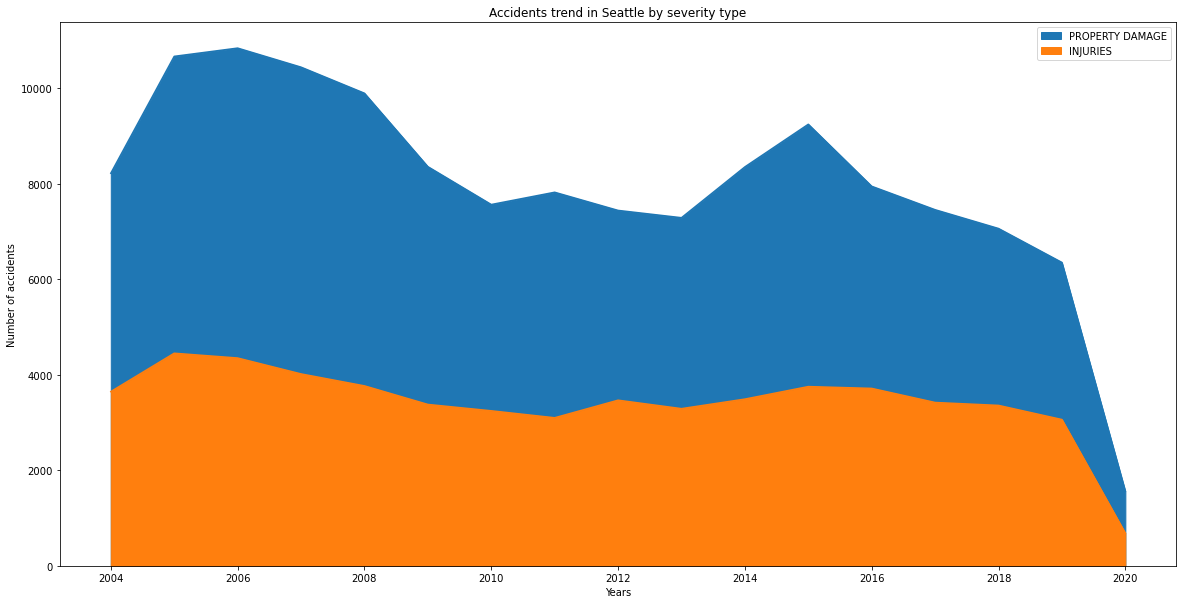

In [10]:
#PLOT THE TREND
sev_1_2.plot(kind='area', 
             alpha=1,
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Accidents trend in Seattle by severity type')
plt.ylabel('Number of accidents')
plt.xlabel('Years')

plt.show()

It appears that overall, the trend of property damage incidents is decreasing. The trend of incidents that ended up with injury is decreasing too, but not as sharp. The peak value for both accident types has been recorded in 2005.

### Statistical exploration of people involved

Now let us have a quick look at the statistical summary of the number of people involved in each accident type, to determine whether there is any significant statistical difference of those values for our future classification algorithm. To achieve this, I have created a separate data frame which contains SEVERITYCODE and PERSONCOUNT. 

In [17]:
#BACK TO NORMAL FLOAT VIEW WITH 2 DECIMAL
pd.options.display.float_format = '{:,.2f}'.format

#RETRIEVE SEVERITYCODE AND PERSONCOUNT
df_box = df_explore[['SEVERITYCODE', 'PERSONCOUNT']]

#ARRANGE INTO A PROPER DF
box_sev_2 = df_box[df_box['SEVERITYCODE'] == 2]
box_sev_2 = box_sev_2.rename(columns={'PERSONCOUNT': 'INJURIES'})
box_sev_2 = box_sev_2[['INJURIES']].reset_index(drop=True)

box_sev_1 = df_box[df_box['SEVERITYCODE'] == 1]
box_sev_1 = box_sev_1.rename(columns={'PERSONCOUNT': 'PROPERTY DAMAGE'})
box_sev_1 = box_sev_1[['PROPERTY DAMAGE']].reset_index(drop=True)

#MERGE AND SHOW STATISTICAL SUMMARY
box_sev_1_2 = pd.concat([box_sev_1, box_sev_2], axis=1, sort=False)
box_sev_1_2.describe()

,PROPERTY DAMAGE,INJURIES
count,"136,485.00","58,188.00"
mean,2.33,2.71
std,1.23,1.54
min,0.00,0.00
25%,2.00,2.00
50%,2.00,2.00
75%,3.00,3.00
max,57.00,81.00


In [18]:
#PLOT IT!
box_sev_1_2.plot(kind='box', figsize=(10, 10))
plt.yscale('log')
plt.title('Box Plot of People Count Involved in a Car Accident in Seattle')
plt.ylabel('Number of People')
plt.xlabel('Type of Accident')

plt.show()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

It seems like there is no significant difference between the count of people involved in both types of accidents, and therefore we should not include it in the classification algorithm.

### Exploring core data for ML algorithm

Let us start investigating the core data by looking at the visual representation of accident features, to have an idea about their frequency of occurring.
The figure below is a bar chart of features count in our processed data set:

In [ ]:
#COUNT ALL ACCIDENT FEATURES
df_hist = pd.DataFrame(df_final.sum(axis = 0, skipna = True))
df_hist.iloc[0,0] = 96662
df_hist = df_hist.rename(columns={0: 'Count'}, index={'SEVERITYCODE': 'Total Accidents', 'ADDRTYPE': 'At Intersection', 'UNDERINFL': 'Under Influence',
                                                             'WEATHER': 'Bad Weather', 'ROADCOND': 'Bad Road Conditiions', 'LIGHTCOND': 'Bad Light Conditiions',
                                                             'SPEEDING': 'Speeding',})

df_hist.sort_values(['Count'], ascending=True, axis=0, inplace=True)
df_hist

In [ ]:
#PLOT ALL FEATURES COUNT
df_hist.plot(kind='barh', figsize=(10, 6), color = '#66BB11')
plt.xlabel('Count of Accidents')
plt.title('Accidents under both cattegories')

We can see that most of the accidents overall happen at intersections and during bad weather conditions, such as rain, snow, etc. Speeding and alcohol/drugs influence does not occur very often.

Next, we will split our dataset into two based on the severity code (category). This will help us to uncover if there is any significant correlation between severity and features. 

The below figures are bar charst of features count for accidents under code 1 and 2 separately (property damage.

In [ ]:
#SPLIT DATA SET INTO 2 BASED ON SEVERITYCODE
df_sev_1 = df_final.loc[df_final['SEVERITYCODE'] == 1]
df_sev_2 = df_final.loc[df_final['SEVERITYCODE'] == 2]

In [ ]:
#ARRANGE DATA FOR SEV 1 (PROPERTY DAMAGE)
df_sev1_bar = pd.DataFrame(df_sev_1.sum(axis = 0, skipna = True))
df_sev1_bar = df_sev1_bar.rename(columns={0: 'Count'}, index={'SEVERITYCODE': 'Total Accidents', 'ADDRTYPE': 'At Intersection', 'UNDERINFL': 'Under Influence',
                                                             'WEATHER': 'Bad Weather', 'ROADCOND': 'Bad Road Conditiions', 'LIGHTCOND': 'Bad Light Conditiions',
                                                             'SPEEDING': 'Speeding',})

df_sev1_bar.sort_values(['Count'], ascending=True, axis=0, inplace=True)
df_sev1_bar

In [ ]:
#ARRANGE DATA FOR SEV 2 (INJURY)
df_sev2_bar = pd.DataFrame(df_sev_2.sum(axis = 0, skipna = True))
df_sev2_bar.iloc[0,0] = df_sev2_bar.iloc[0,0]/2
df_sev2_bar = df_sev2_bar.rename(columns={0: 'Count'}, index={'SEVERITYCODE': 'Total Accidents', 'ADDRTYPE': 'At Intersection', 'UNDERINFL': 'Under Influence',
                                                             'WEATHER': 'Bad Weather', 'ROADCOND': 'Bad Road Conditiions', 'LIGHTCOND': 'Bad Light Conditiions',
                                                             'SPEEDING': 'Speeding',})

df_sev2_bar.sort_values(['Count'], ascending=True, axis=0, inplace=True)
df_sev2_bar

In [ ]:
#PLOT PROPERTY DAMAGE
df_sev1_bar.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Count of Accidents')
plt.title('Accidents under code 1 - Property Damage')

Here we can see that accidents that caused property damage mainly have bad weather (17, 063 cases or 35%) and bad light conditions attributes (16,846 cases or 34%). 

Over-speeding and under influence conditions are met quite rarely. 

The next figure represents the same details for accidents under code 2, which caused the injury.

In [ ]:
#PLOT INJURY
df_sev2_bar.plot(kind='barh', figsize=(10, 6), color = 'r')
plt.xlabel('Count of Accidents')
plt.title('Accidents under code 2 - Injury')

Here we can see that the main attribute has changed. It appears that accidents that caused the injury, happen at an intersection more frequently than the same of property damage (23,319 cases against 14,578). 

The number of drivers who were under influence of drugs or were disobeying speed limits is significantly higher as well (+50%), even though the absolute values remain low.

Bad weather, light, and road conditions do not have any visible difference.

The intermediate conclusion that can be made is that Intersections, driving under alcohol/drugs, and over-speeding are more prompt to cause injuries during the car accident.

### LOGISTIC REGRESSION

Let us try to use some Machine Learning algorithms and see if they confirm our intuition.

Since our data is categorical, we are going to use classification algorithms and investigate which features have more significant coefficients during the classification process.

For this task, I decided to use Logistic Regression from sklearn library. You may refer to the notebook for a detailed description of the code. 

In [ ]:
#IMPORT LIBRARIES
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing

In [ ]:
#DEFINE X
X = np.asarray(df_final[['ADDRTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']])
X = X.astype('int')
X[0:5]

In [ ]:
#DEFINE Y
y = np.asarray(df_final['SEVERITYCODE'])
y = y.astype('int')
y [0:5]

In [ ]:
#NORMALIZE
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

In [ ]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
#MODEL
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.05, solver='sag').fit(X_train,y_train)
LR.coef_

In [ ]:
#PREDICT
yhat = LR.predict(X_test)
yhat

In [ ]:
#PREDCTION PROBABILITY
yhat_prob = LR.predict_proba(X_test)
yhat_prob

In [ ]:
#EVALUATION
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print("Jaccard: ", jaccard_similarity_score(y_test, yhat))
print("F1: ", f1_score(y_test, yhat, average='weighted'))
print("LOGLOSS: ", log_loss(y_test, yhat_prob))

In [ ]:
#REPORT OF COEFFICIENTS
pd.options.display.float_format = '{:,.2f}'.format

report1 = {'FEATURE': ['ADDRTYPE', 'UNDERINFL', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], 
          'COEFFICIENT': [0.38, 0.11, 0.11, 0.02, 0.01, -0.09]}

df_report = pd.DataFrame(report1, columns=['FEATURE', 'COEFFICIENT'])
df_report

In [ ]:
#REPORT OF EVALUATIONS
report2 = {'METRICS': ['Jaccard', 'F1', 'LogLoss'], 
          'SCORE': [0.60, 0.60, 0.66]}

df_report2 = pd.DataFrame(report2, columns=['METRICS', 'SCORE'])
df_report2

## RESULTS

Our model did not score a lot in terms of statistical metrics. However, the predictability of the model was not my main intention. More than that, I was using this tool to determine the significance of each selected attribute, so we can derive a generalized conclusion regarding the cause of accidents with injury.

As I suspected earlier, ADDRTYPE (Intersection or not), Influence of Drugs/Alcohol, and Speeding are the main factors taken into consideration by our model, while classifying the accident, and therefore have higher coefficients.

Weather, Road, and Light condition are not of major importance. 

## DISCUSSION

Within this small research, we were able to look at causes of the injuries that occurred during car crashes under a different angle. Common sense tells us that such factors as bad weather or road conditions should be the most dangerous, however, it turns out that such factors as incidents happened at intersection, alcohol, and speeding outweigh everything else and are the biggest risk factors. 

Drivers should be especially careful at intersections, obey speed limits, and never drive drunk or high to avoid severe consequences. 

It is the responsibility of the government to introduce high fines and effective prosecution for over-speeding and drunk driving, however, a lot here depends on the culture and responsibility of drivers themselves. 

Something that depends on drivers less is the metropolitan transport infrastructure. Cities should try to reduce the number of dangerous intersections and consider overhead bridges, underground tunnels, or multi-layer highways, wherever possible. Offloading traffic from city-centers will help a lot too.

It seems though that city of Seattle is doing a good job to reduce the number of accidents, which has been discovered by plotting the trend earlier. But it is still not enough and far from perfection.

## CONCLUSION

In this research, we were able to find the most dangerous factors causing injuries during a car accident. To achieve this, we used Seattle Traffic Collisions Dataset, processed it according to our needs, reviewed it with the help of graphics, and applied Logistic Regression to determine the factors which weigh the most.

Intersections, drunk driving, and over-speeding contribute the most to injuries, and as the result, to a terrible human lives toll which roads and highways claim every year.

I hope that fellow readers, equipped with this knowledge, will do their best to stay safe while driving.

Our safety depends on our decisions and attitude. Let us prove the ability to be responsible for ourselves as well as for those who we love.